In [1]:
import numpy as np
import polars as pl

from Utils import plot_pdf_stats

In [9]:
df = pl.read_csv("dataSPX.csv")
df = pl.read_csv("Archive/AFL_2010_05.csv")
df = pl.read_csv("Archive/BKR_2010_05.csv")

In [10]:
df = df.with_columns(
    pl.col("xltime").str.strptime(pl.Datetime, "%+")
)

df = df.with_columns(
    (pl.col("xltime").dt.timestamp()/ 1e3).diff().alias("dt_ms")
)

df

,xltime,trade-price,trade-volume,bid-price,bid-volume,ask-price,ask-volume,dt_ms
i64,"datetime[μs, UTC]",f64,i64,f64,i64,f64,i64,f64
0,2010-05-03 17:30:21.959 UTC,35.51,600,35.51,3,35.8,2,null
1,2010-05-03 17:31:02.249 UTC,35.51,100,35.51,2,35.52,1,40290.0
2,2010-05-03 17:31:15.998 UTC,35.51,100,35.51,2,35.7,1,13749.0
3,2010-05-03 17:34:06.637 UTC,35.51,100,35.51,1,35.61,1,170639.0
4,2010-05-03 17:36:46.294 UTC,35.55,133,35.46,4,35.56,1,159657.0
…,…,…,…,…,…,…,…,…
2562,2010-05-28 23:57:49.680 UTC,36.39,100,36.28,3,36.4,1,26323.0
2563,2010-05-28 23:58:08.164 UTC,36.31,100,36.31,1,36.39,1,18484.0
2564,2010-05-28 23:58:08.263 UTC,36.29,100,36.27,21,36.39,4,99.0


In [11]:
def create_volume_TS(df):
    vol_TS = df.select(["dt_ms","trade-price","bid-price","ask-price", "trade-volume"])
    
    vol_TS = vol_TS.with_columns(
        (pl.col("trade-volume").diff()/pl.col("dt_ms")).alias("vol_diff/dt_ms"),
        (pl.col("trade-price").pct_change()*pl.col("dt_ms").mean()/pl.col("dt_ms").diff()).alias("returns/dt_ms*avg_dt")
    )
    
    return vol_TS    

In [12]:
volume_df = create_volume_TS(df).drop_nulls()
volume_df.describe()

statistic,dt_ms,trade-price,bid-price,ask-price,trade-volume,vol_diff/dt_ms,returns/dt_ms*avg_dt
str,f64,f64,f64,f64,f64,f64,f64
"""count""",2565.0,2565.0,2565.0,2565.0,2565.0,2565.0,2565.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",851227.072904,37.945889,37.880599,38.028066,176.597661,0.020368,inf
"""std""",9.4554e6,1.645454,1.661203,1.743342,346.462696,7.823763,NaN
"""min""",1.0,35.15,33.0,35.35,100.0,-125.0,-1688.315558
"""25%""",4449.0,36.58,36.51,36.64,100.0,0.0,-0.004938
"""50%""",47010.0,37.5,37.42,37.59,100.0,0.0,0.0
"""75%""",193987.0,39.79,39.75,39.84,200.0,0.0,0.004394
"""max""",2.35917529e8,41.33,41.22,58.4,10200.0,300.0,inf


Mean: 0.02036795778038185
Median: 0.0
Standard Deviation: 7.823763220821891


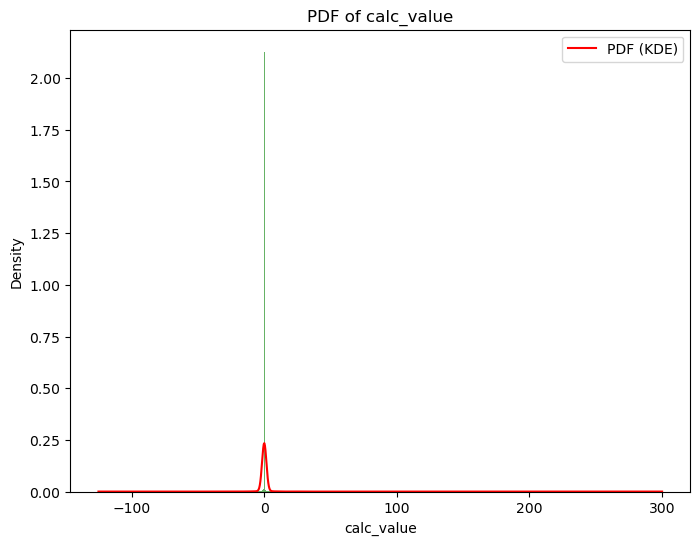

In [13]:
plot_pdf_stats(df=volume_df, x_col_name="vol_diff/dt_ms")

We will assume that each stock has a volume std that is computed using past inputs 
\
For now I will use the vol_std of the day in the current day -> not right
\
Same is done with the mean

In [14]:
from Strategies import short_excess_vol_strategy, momentum_excess_vol_strategy

def trade_vol_std(df, thresh, stock_vol_mean, stock_vol_std):
    df = df.with_columns(
        (pl.when(pl.col("vol_diff/dt_ms")>stock_vol_mean+thresh*stock_vol_std).then(1).otherwise(pl.when(pl.col("vol_diff/dt_ms")<stock_vol_mean-thresh*stock_vol_std).then(-1).otherwise(0))).alias("trading_scheme_enter").shift(),
        pl.col("returns/dt_ms*avg_dt").shift()
    )
    
    df = df.with_columns(
        (pl.when(pl.col("vol_diff/dt_ms")<stock_vol_mean).then(1).otherwise(pl.when(pl.col("vol_diff/dt_ms")>stock_vol_mean).then(-1).otherwise(0))).alias("trading_scheme_leave").shift()
    )
    
    
    df = df.drop_nulls()
    
    #df, value = short_excess_vol_strategy(df)
    df, value = momentum_excess_vol_strategy(df, plot_graph=False)

    
    return df, value
mean = volume_df.select(["vol_diff/dt_ms"]).mean().item()
std = volume_df.select(["vol_diff/dt_ms"]).std().item()
for i in range(15):
    print(f"threshold is {i}")
    da, value = trade_vol_std(df=volume_df, thresh=i, stock_vol_mean=mean, stock_vol_std=std)
    print(value)

threshold is 0
Number of times in position: 167
[-374.7752381]
threshold is 1
Number of times in position: 22
[231.293]
threshold is 2
Number of times in position: 12
[304.57333333]
threshold is 3
Number of times in position: 9
[225.88666667]
threshold is 4
Number of times in position: 5
[-41.02366667]
threshold is 5
Number of times in position: 4
[-3.09366667]
threshold is 6
Number of times in position: 4
[-3.09366667]
threshold is 7
Number of times in position: 3
[-76.507]
threshold is 8
Number of times in position: 3
[-76.507]
threshold is 9
Number of times in position: 3
[-76.507]
threshold is 10
Number of times in position: 3
[-76.507]
threshold is 11
Number of times in position: 3
[-76.507]
threshold is 12
Number of times in position: 2
[-36.335]
threshold is 13
Number of times in position: 1
[0.255]
threshold is 14
Number of times in position: 1
[0.255]
